<a href="https://colab.research.google.com/github/SunitMitra/Stock-Prediction-Using-Machine-LEarning-Algorithms/blob/main/Stock_Prediction_Using_Machine_LEarning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#load the data
from google.colab import files
files.upload()

Saving KO (1).csv to KO (1).csv


{'KO (1).csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2020-08-17,48.320000,48.750000,48.200001,48.209999,46.707195,9102400\n2020-08-18,48.200001,48.500000,47.959999,48.419998,46.910648,9829000\n2020-08-19,48.119999,48.380001,47.220001,47.369999,45.893383,17371000\n2020-08-20,47.270000,47.599998,47.090000,47.349998,45.874001,11308700\n2020-08-21,47.340000,47.500000,46.970001,47.279999,45.806187,14734100\n2020-08-24,47.430000,47.980000,47.180000,47.970001,46.474682,9257700\n2020-08-25,48.000000,48.049999,47.650002,47.910000,46.416546,7827800\n2020-08-26,47.759998,48.180000,47.470001,48.160000,46.658756,10124200\n2020-08-27,48.250000,48.820000,48.200001,48.230000,46.726570,10931600\n2020-08-28,48.750000,49.849998,48.529999,49.830002,48.276699,16420300\n2020-08-31,49.799999,50.070000,49.349998,49.529999,47.986050,18510800\n2020-09-01,49.310001,49.349998,48.830002,49.119999,47.588829,12588400\n2020-09-02,49.360001,51.360001,49.360001,51.189999,49.594303,26332600\n2020-09-03,51.400002,

In [3]:
#store the data
df = pd.read_csv('KO (1).csv')
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-17,48.320000,48.750000,48.200001,48.209999,46.707195,9102400
1,2020-08-18,48.200001,48.500000,47.959999,48.419998,46.910648,9829000
2,2020-08-19,48.119999,48.380001,47.220001,47.369999,45.893383,17371000
3,2020-08-20,47.270000,47.599998,47.090000,47.349998,45.874001,11308700
4,2020-08-21,47.340000,47.500000,46.970001,47.279999,45.806187,14734100
5,2020-08-24,47.430000,47.980000,47.180000,47.970001,46.474682,9257700
6,2020-08-25,48.000000,48.049999,47.650002,47.910000,46.416546,7827800
7,2020-08-26,47.759998,48.180000,47.470001,48.160000,46.658756,10124200
8,2020-08-27,48.250000,48.820000,48.200001,48.230000,46.726570,10931600
9,2020-08-28,48.750000,49.849998,48.529999,49.830002,48.276699,16420300


In [4]:
#show and store the last row of data
actual_price=df.tail(1)
#show the data
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
20,2020-09-15,51.0,51.380001,50.84,51.049999,49.859024,12838400


In [5]:
#get all the data except the las row
df=df.head(len(df)-1)
#show the data set
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-17,48.320000,48.750000,48.200001,48.209999,46.707195,9102400
1,2020-08-18,48.200001,48.500000,47.959999,48.419998,46.910648,9829000
2,2020-08-19,48.119999,48.380001,47.220001,47.369999,45.893383,17371000
3,2020-08-20,47.270000,47.599998,47.090000,47.349998,45.874001,11308700
4,2020-08-21,47.340000,47.500000,46.970001,47.279999,45.806187,14734100
5,2020-08-24,47.430000,47.980000,47.180000,47.970001,46.474682,9257700
6,2020-08-25,48.000000,48.049999,47.650002,47.910000,46.416546,7827800
7,2020-08-26,47.759998,48.180000,47.470001,48.160000,46.658756,10124200
8,2020-08-27,48.250000,48.820000,48.200001,48.230000,46.726570,10931600
9,2020-08-28,48.750000,49.849998,48.529999,49.830002,48.276699,16420300


In [6]:
#create empty lists
days=list()
adj_close_prices=list()

In [7]:
#get only the date and the adj close prices
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [8]:
#create the independent data set (Dates)
for day in df_days:
  days.append([int(day.split('-')[2])])
#create the dependent data set (Adj Close)
for adj_close_price in df_adj_close:
  adj_close_prices.append(float(adj_close_price))

In [9]:
#show the days
days

[[17],
 [18],
 [19],
 [20],
 [21],
 [24],
 [25],
 [26],
 [27],
 [28],
 [31],
 [1],
 [2],
 [3],
 [4],
 [8],
 [9],
 [10],
 [11],
 [14]]

In [10]:
#show the adj_close _prices
adj_close_prices

[46.707195,
 46.910647999999995,
 45.893383,
 45.874001,
 45.806187,
 46.474682,
 46.416546000000004,
 46.658756,
 46.72657,
 48.276699,
 47.98605,
 47.588829,
 49.594303000000004,
 48.906433,
 49.448982,
 48.25732,
 48.625477000000004,
 48.441399,
 49.468357,
 49.526958]

In [11]:
#create 3 models 
lin_svr= SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)

poly_svr= SVR(kernel='poly', C=1000.0,degree=2)
poly_svr.fit(days,adj_close_prices)

rbf_svr= SVR(kernel='rbf', C=1000.0,gamma=0.85)
rbf_svr.fit(days,adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.85,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

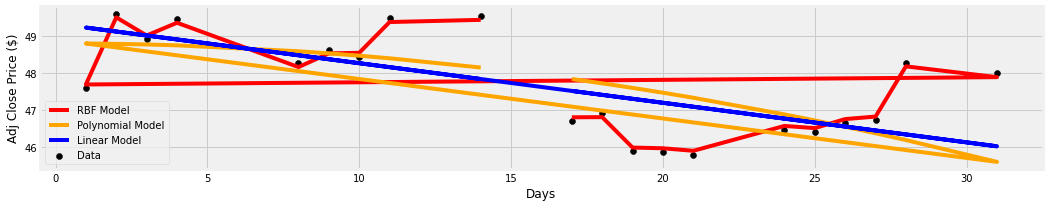

In [14]:
#plot the models
plt.figure(figsize=(16,3))
plt.scatter(days, adj_close_prices, color = 'black', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color = 'red', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price ($)')
plt.legend()
plt.show()

In [16]:
#show the predicted price for the given day
day=[[15]]
print('The RBF SVR predicted price:', rbf_svr.predict(day))
print('The Linear SVR predicted price:', lin_svr.predict(day))
print('The Polynomial SVR predicted price:', poly_svr.predict(day))

The RBF SVR predicted price: [48.44522077]
The Linear SVR predicted price: [47.72938413]
The Polynomial SVR predicted price: [48.04870254]


In [18]:
#show the actual price
print('the actual price:', actual_price['Adj Close'][20])

the actual price: 49.859024
